In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from datetime import date
from datetime import timedelta

In [2]:
data = pd.read_csv("data/ETHUSD_day.csv")

In [3]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.620620e+12,10-05-2021 04:00,ETHUSD,4060.21,4345.44,3500.00,3924.70,49801.11878
1,1.620530e+12,09-05-2021 04:00,ETHUSD,3874.49,4077.70,3725.00,4060.21,23638.51668
2,1.620450e+12,08-05-2021 04:00,ETHUSD,3539.73,3968.37,3512.13,3874.49,25676.87443
3,1.620360e+12,07-05-2021 04:00,ETHUSD,3427.49,3595.00,3355.01,3539.73,15974.56746
4,1.620270e+12,06-05-2021 04:00,ETHUSD,3478.06,3598.05,3402.01,3427.49,16516.66968


In [4]:
#df_mask= data['Date']=='05-01-2018 04:00'
#filtered_df = data[df_mask]
#filtered_df

In [5]:
ethereum_day = data.copy()

In [6]:
ethereum_day.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.620620e+12,10-05-2021 04:00,ETHUSD,4060.21,4345.44,3500.00,3924.70,49801.11878
1,1.620530e+12,09-05-2021 04:00,ETHUSD,3874.49,4077.70,3725.00,4060.21,23638.51668
2,1.620450e+12,08-05-2021 04:00,ETHUSD,3539.73,3968.37,3512.13,3874.49,25676.87443
3,1.620360e+12,07-05-2021 04:00,ETHUSD,3427.49,3595.00,3355.01,3539.73,15974.56746
4,1.620270e+12,06-05-2021 04:00,ETHUSD,3478.06,3598.05,3402.01,3427.49,16516.66968


In [7]:
ethereum_day.drop(columns=['Unix Timestamp', 'Symbol'], inplace=True)


In [8]:
ethereum_day.head()

,Date,Open,High,Low,Close,Volume
0,10-05-2021 04:00,4060.21,4345.44,3500.00,3924.70,49801.11878
1,09-05-2021 04:00,3874.49,4077.70,3725.00,4060.21,23638.51668
2,08-05-2021 04:00,3539.73,3968.37,3512.13,3874.49,25676.87443
3,07-05-2021 04:00,3427.49,3595.00,3355.01,3539.73,15974.56746
4,06-05-2021 04:00,3478.06,3598.05,3402.01,3427.49,16516.66968


In [9]:
ethereum_day.columns = ['Date', 'Opening_Price_ETH', 'Highest_rice_ETH', 'Lowest_Price_ETH', 'Lowest_Price_ETH', 'Vol_ETH']

In [10]:
ethereum_day.head()

,Date,Opening_Price_ETH,Highest_rice_ETH,Lowest_Price_ETH,Lowest_Price_ETH,Vol_ETH
0,10-05-2021 04:00,4060.21,4345.44,3500.00,3924.70,49801.11878
1,09-05-2021 04:00,3874.49,4077.70,3725.00,4060.21,23638.51668
2,08-05-2021 04:00,3539.73,3968.37,3512.13,3874.49,25676.87443
3,07-05-2021 04:00,3427.49,3595.00,3355.01,3539.73,15974.56746
4,06-05-2021 04:00,3478.06,3598.05,3402.01,3427.49,16516.66968


In [11]:
ethereum_day.describe()

,Opening_Price_ETH,Highest_rice_ETH,Lowest_Price_ETH,Lowest_Price_ETH,Vol_ETH
count,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03
mean,369.512834,385.349130,353.399866,371.673660,3.356898e+04
std,489.590247,515.258537,468.345511,496.526275,6.227139e+04
min,0.000000,7.290000,0.000000,7.030000,0.000000e+00
25%,126.372500,131.260000,120.937500,126.737500,7.076064e+03
50%,219.610000,226.860000,210.010000,220.315000,1.721786e+04
75%,398.480000,413.017500,385.332500,399.615000,3.671964e+04
max,4060.210000,4345.440000,3725.000000,4060.210000,1.824554e+06


In [12]:
def df_info(df):
        len_df = len(df)
        all_columns = len(df.columns)

        print(f"""
        Longueur du dataset : {len_df} enregistrements
        Nombre de colonnes : {all_columns}
        """)

        echantillonColonnes = []
        for i in df.columns:
            listcolumn = str(list(df[i].head(5)))
            echantillonColonnes.append(listcolumn)
       
        pd.set_option("max_rows", None)
        obs = pd.DataFrame({'type': list(df.dtypes),
        'Echantillon': echantillonColonnes,
        "% de valeurs nulles":
        round(df.isna().sum() / len_df * 100, 2),
        'Nbr L dupliquées' : (df.duplicated()).sum(),
        'Nbr V unique' : df.nunique()
        })
        return obs
df_info(ethereum_day)


        Longueur du dataset : 1828 enregistrements
        Nombre de colonnes : 6
        


,type,Echantillon,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
Date,object,"['10-05-2021 04:00', '09-05-2021 04:00', '08-0...",0.0,0,1828
Opening_Price_ETH,float64,"[4060.21, 3874.49, 3539.73, 3427.49, 3478.06]",0.0,0,1738
Highest_rice_ETH,float64,"[4345.44, 4077.7, 3968.37, 3595.0, 3598.05]",0.0,0,1690
Lowest_Price_ETH,float64,"['Lowest_Price_ETH', 'Lowest_Price_ETH']",0.0,0,1667
Lowest_Price_ETH,float64,"['Lowest_Price_ETH', 'Lowest_Price_ETH']",0.0,0,1725
Vol_ETH,float64,"[49801.11878, 23638.51668, 25676.87443, 15974....",0.0,0,1805


In [13]:
print(f'total duplicate rows: {ethereum_day.duplicated().sum()}')
ethereum_day.shape

total duplicate rows: 0


(1828, 6)

In [14]:
ethereum_day = ethereum_day[~ethereum_day.duplicated()]
ethereum_day.shape

(1828, 6)

In [15]:
ethereum_day['Date']

1029    16-07-2018 04:00
1030    15-07-2018 04:00
1031    14-07-2018 04:00
1032    13-07-2018 04:00
1033    12-07-2018 04:00
1034    11-07-2018 04:00
1035    10-07-2018 04:00
1036    09-07-2018 04:00
1037    08-07-2018 04:00
1038    07-07-2018 04:00
1039    06-07-2018 04:00
1040    05-07-2018 04:00
1041    04-07-2018 04:00
1042    03-07-2018 04:00
1043    02-07-2018 04:00
1044    01-07-2018 04:00
1045    30-06-2018 04:00
1046    29-06-2018 04:00
1047    28-06-2018 04:00
1048    27-06-2018 04:00
1049    26-06-2018 04:00
1050    25-06-2018 04:00
1051    24-06-2018 04:00
1052    23-06-2018 04:00
1053    22-06-2018 04:00
1054    21-06-2018 04:00
1055    20-06-2018 04:00
1056    19-06-2018 04:00
1057    18-06-2018 04:00
1058    17-06-2018 04:00
1059    16-06-2018 04:00
1060    15-06-2018 04:00
1061    14-06-2018 04:00
1062    13-06-2018 04:00
1063    12-06-2018 04:00
1064    11-06-2018 04:00
1065    10-06-2018 04:00
1066    09-06-2018 04:00
1067    08-06-2018 04:00
1068    07-06-2018 04:00


In [16]:
ethereum_day['Date'] =ethereum_day['Date'].apply(lambda x:x.replace(' 04:00', ''))

In [17]:
ethereum_day['Date']

-2019
777     25-03-2019
778     24-03-2019
779     23-03-2019
780     22-03-2019
781     21-03-2019
782     20-03-2019
783     19-03-2019
784     18-03-2019
785     17-03-2019
786     16-03-2019
787     15-03-2019
788     14-03-2019
789     13-03-2019
790     12-03-2019
791     11-03-2019
792     10-03-2019
793     09-03-2019
794     08-03-2019
795     07-03-2019
796     06-03-2019
797     05-03-2019
798     04-03-2019
799     03-03-2019
800     02-03-2019
801     01-03-2019
802     28-02-2019
803     27-02-2019
804     26-02-2019
805     25-02-2019
806     24-02-2019
807     23-02-2019
808     22-02-2019
809     21-02-2019
810     20-02-2019
811     19-02-2019
812     18-02-2019
813     17-02-2019
814     16-02-2019
815     15-02-2019
816     14-02-2019
817     13-02-2019
818     12-02-2019
819     11-02-2019
820     10-02-2019
821     09-02-2019
822     08-02-2019
823     07-02-2019
824     06-02-2019
825     05-02-2019
826     04-02-2019
827     03-02-2019
828     02-02-2019
829   

In [18]:
ethereum_day['Date'] = pd.to_datetime(ethereum_day['Date'], dayfirst=True )
ethereum_day['Date']

5-23
719    2019-05-22
720    2019-05-21
721    2019-05-20
722    2019-05-19
723    2019-05-18
724    2019-05-17
725    2019-05-16
726    2019-05-15
727    2019-05-14
728    2019-05-13
729    2019-05-12
730    2019-05-11
731    2019-05-10
732    2019-05-09
733    2019-05-08
734    2019-05-07
735    2019-05-06
736    2019-05-05
737    2019-05-04
738    2019-05-03
739    2019-05-02
740    2019-05-01
741    2019-04-30
742    2019-04-29
743    2019-04-28
744    2019-04-27
745    2019-04-26
746    2019-04-25
747    2019-04-24
748    2019-04-23
749    2019-04-22
750    2019-04-21
751    2019-04-20
752    2019-04-19
753    2019-04-18
754    2019-04-17
755    2019-04-16
756    2019-04-15
757    2019-04-14
758    2019-04-13
759    2019-04-12
760    2019-04-11
761    2019-04-10
762    2019-04-09
763    2019-04-08
764    2019-04-07
765    2019-04-06
766    2019-04-05
767    2019-04-04
768    2019-04-03
769    2019-04-02
770    2019-04-01
771    2019-03-31
772    2019-03-30
773    2019-03-29
774  

In [19]:
df_mask= ethereum_day['Date']=='2018-01-05'
filtered_df = ethereum_day[df_mask]
filtered_df

,Date,Opening_Price_ETH,Highest_rice_ETH,Lowest_Price_ETH,Lowest_Price_ETH,Vol_ETH
1221,2018-01-05,992.01,1020.0,931.4,971.52,81311.55779


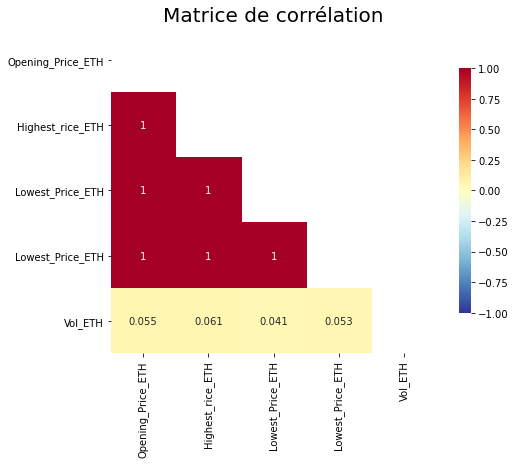

In [20]:
corr = ethereum_day.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, vmin=-1,cmap='RdYlBu_r', vmax=1, square=True,
            cbar_kws={"shrink": .75}, annot=True).set_title('Matrice de corrélation', fontsize=20);

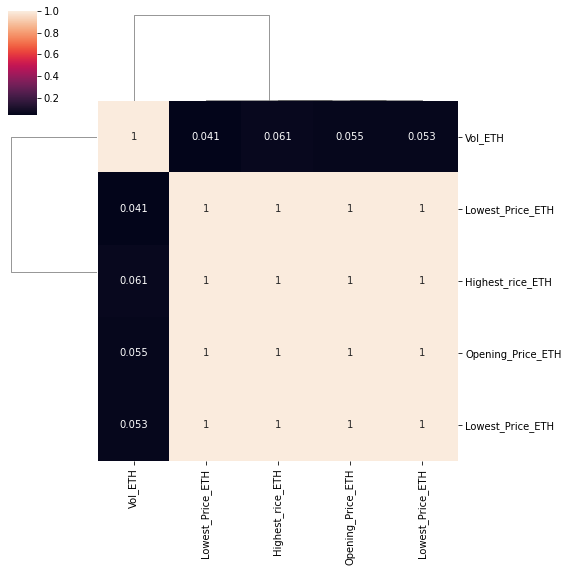

In [21]:
sns.clustermap(corr, annot=True, figsize=(8,8));

In [22]:
ethereum_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 0 to 1827
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1828 non-null   datetime64[ns]
 1   Opening_Price_ETH  1828 non-null   float64       
 2   Highest_rice_ETH   1828 non-null   float64       
 3   Lowest_Price_ETH   1828 non-null   float64       
 4   Lowest_Price_ETH   1828 non-null   float64       
 5   Vol_ETH            1828 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 100.0 KB


In [23]:
ethereum_day_opening_price = ethereum_day[["Date", "Opening_Price_ETH"]]

new_names = {
    "Date": "ds", 
    "Opening_Price_ETH": "y",
}

ethereum_day_opening_price = ethereum_day_opening_price.rename(columns=new_names)

In [33]:
# plot the open price
x = ethereum_day_opening_price["ds"]
y = ethereum_day_opening_price["y"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))# Set title
fig.update_layout(
    title_text="Time series plot of Ethereum Open Price",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

fig.add_annotation(x='2019-02-16', y=1000,
            text="test texte",
            showarrow=True,
            arrowhead=1)

In [25]:
model = Prophet(seasonality_mode="multiplicative")

model.fit(ethereum_day_opening_price);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
prediction = model.make_future_dataframe(periods = 365)
prediction.tail()

,ds
2188,2022-05-06
2189,2022-05-07
2190,2022-05-08
2191,2022-05-09
2192,2022-05-10


In [27]:
forecast = model.predict(prediction)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-05-09,15.858871,-67.240331,102.971567
1,2016-05-10,15.955606,-74.413825,98.196927
2,2016-05-11,16.150417,-72.134414,96.885886
3,2016-05-12,16.335778,-67.487700,95.129014
4,2016-05-13,16.314454,-67.319993,104.161299


In [28]:
next_day = (date(2021, 1, 1)) + timedelta(days=1)
forecast[forecast['ds'] == next_day]['yhat']

plot_plotly(model, forecast)